# T4 FOXSI2 - Quiet Sun Analysis for D0145
## May 2021
## Milo BC - Berkeley

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits
from glob import glob
import sunpy.coordinates
import datetime

# Parameters
Dir = './D0145_rays/'
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
T4x, T4y = 200, 750    # Target center
sim_scale = 1031.328   # 1cm = 1031.328 arcsec
#sim_scale = 17.18880   # 1cm = 17.4 arcmin
Xmask, Ymask = -210, 260
Xmask2, Ymask2 = 650, 180
Rmask = 650
Rmask2 = 280
Xflare, Yflare = -77, 78
Rsun  = sunpy.coordinates.sun.angular_radius(datetime.datetime(2014,12,11,19,11)).value \
        * (1 + 100/695700) # This is equivalent to chose a buffer of 100km over the solar photosphere.

def readrays(file):
    # load rays
    Rays = load_rays(file)
    # fix a small bug
    for r in Rays:
        r.hist = r.hist.tolist()
    # Create detector :
    detector = Detector(width=40,
                        height=40,
                        normal = [0,0,1],
                        center = [0,0,230], # f-distance + segment lenght
                        reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Rays)
    # Select D, H, and P rays
    Drays = [r for r in Rays if (r.des[2]==230 and r.bounces ==2 )]
    Srays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 )]
    Hrays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Hy-D' )]
    Prays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Pa-D' )]
    # Define initial void lists to store rays to return
    All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []    
    #Hyperboloid
    Hx, Hy = [], []
    for r in Hrays:
        Hx.append(r.pos[0]*sim_scale + T4x)
        Hy.append(r.pos[1]*sim_scale + T4y)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
    # Paraboloid
    Px, Py = [], []
    for r in Prays:
        Px.append(r.pos[0]*sim_scale + T4x)
        Py.append(r.pos[1]*sim_scale + T4y)
    All_Px.append(Px)
    All_Py.append(Py)
    # Double
    Dx, Dy = [], []
    for r in Drays:
        Dx.append(r.pos[0]*sim_scale + T4x)
        Dy.append(r.pos[1]*sim_scale + T4y)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    
    return All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy

Rays from ./D0145_rays/D0145S1.csv loaded.
reading ./D0145_rays/D0145S1.csv
Rays from ./D0145_rays/D0145S2.csv loaded.
reading ./D0145_rays/D0145S2.csv
Rays from ./D0145_rays/D0145S3.csv loaded.
reading ./D0145_rays/D0145S3.csv
Rays from ./D0145_rays/D0145S4.csv loaded.
reading ./D0145_rays/D0145S4.csv
Rays from ./D0145_rays/D0145S5.csv loaded.
reading ./D0145_rays/D0145S5.csv
Rays from ./D0145_rays/D0145S6.csv loaded.
reading ./D0145_rays/D0145S6.csv
Rays from ./D0145_rays/D0145S7.csv loaded.
reading ./D0145_rays/D0145S7.csv


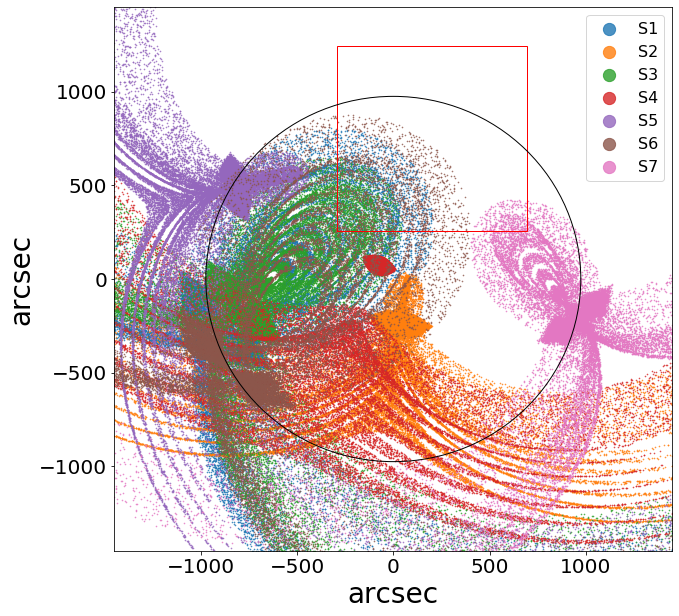

In [145]:
# Plotting
tabcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:brown','tab:pink']
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
#ax.set_title('FOXSI2 - Target 4 - Det 0145',fontsize=28)
# sources:
for tc, source in zip(tabcolors, sorted(glob(Dir+'*.csv'))):
    S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
    print('reading '+source)
    ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
    ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
    ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D0145 - Si
l = 990
# mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-45)) + 1)
# my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-135)) + 1)
# rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[0],linewidth=1,edgecolor='r',facecolor='none')
# ax.add_patch(rect)
# mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-45)) + 1)
# my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-135)) + 1)
# rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[1],linewidth=1,edgecolor='r',facecolor='none')
# ax.add_patch(rect)
# mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-45)) + 1)
# my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-135)) + 1)
# rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[4],linewidth=1,edgecolor='r',facecolor='none')
# ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
# circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
# circ2 = patches.Circle((Xmask2,Ymask2),radius= Rmask2,fill=False);ax.add_patch(circ2)
# legend
lgnd = ax.legend(loc='upper right',scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.legendHandles[3]._sizes = [150]
lgnd.legendHandles[4]._sizes = [150]
lgnd.legendHandles[5]._sizes = [150]
lgnd.legendHandles[6]._sizes = [150]
plt.show()
fig.savefig('images/SourcesT4_D0145.png',bbox_inches='tight',dpi=300)
plt.close(fig)

Rays from ./D0145_rays/D0145S6.csv loaded.
Rays from ./D0145_rays/D0145S6.csv loaded.


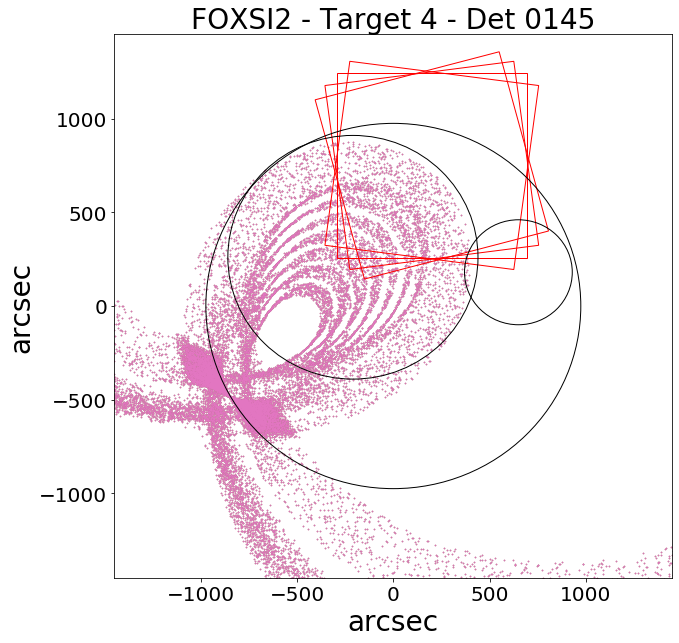

In [3]:
# Plotting
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 0145',fontsize=28)
# sources:
Dir = './D0145_rays/'
source = Dir+'D0145S6.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color='tab:brown',s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color='tab:brown',s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color='tab:brown',s=.4,alpha=0.8)
# source = Dir+'D0145S7.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color='tab:pink',s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color='tab:pink',s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color='tab:pink',s=.4,alpha=0.8)
# D0145 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[1],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
circ2 = patches.Circle((Xmask2,Ymask2),radius= Rmask2,fill=False);ax.add_patch(circ2)
plt.show()
fig.savefig('images/SourcesT4_D0145_Mask.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# Handling IDL SAV files 
### [FOXSI2 T4 D0145]

In [143]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
det = 0
DataDir = './DataFOXSI2/'
offset_xy = [360., -180.]
T4x, T4y = 200, 750
T5x, T5y = 0, -251
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 69060. # in seconds of the day
#Erange = [5, 10] # maximize the amount of counts we got
Erange = [6, 10] # test for Säm
thr_n = 4.
R07s = 650

def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    return data_lvl2_d6_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_d6_ET_noerr = data_lvl2_d6_ET[data_lvl2_d6_ET['ERROR_FLAG']==0]
    return data_lvl2_d6_ET_noerr

def plotdata(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    #ax.set_title('FOXSI2 - Target 5 - Det '+str(det),fontsize=28)
    # FOXSI2 Data
    ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
               np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
               marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    #rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
    r = (R10s if det == 6 else R07s)
    #circ = patches.Circle((Xmask,Ymask),radius= r,fill=False);ax.add_patch(circ)
    #circ2 = patches.Circle((Xmask2,Ymask2),radius= Rmask2,fill=False);ax.add_patch(circ2)
    #circ = patches.Circle((Xflare,Yflare),radius= 100,fill=False);ax.add_patch(circ)
    plt.show()
    fig.savefig(f'images/F2T4D{det}.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plotspect(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,1)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.scatter(es, np.ones_like(es)*.5,s=250, c='grey', marker='o',alpha=0.7)
    ax.vlines(es,ymin=0,ymax=1,color='grey',linestyles='dashed')
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Spec.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def GetDetArea(det, N) :
    lsi = 990 # length of Silicon Detector in arcsec
    # create an initial meshgrid with the size of the Si det :
    Xi, Yi = np.meshgrid(np.linspace(-.5*lsi, .5*lsi, N+1), np.linspace(-.5*lsi, .5*lsi, N+1))
    # rotate and translate :
    Xrt   =  np.cos(np.deg2rad(Dang[det]))*Xi - np.sin(np.deg2rad(Dang[det]))*Yi + T4x # + T4x
    Yrt   =  np.sin(np.deg2rad(Dang[det]))*Xi + np.cos(np.deg2rad(Dang[det]))*Yi + T4y # + T4y
    return Xrt, Yrt

In [76]:
# Defining times:
t4_start = 373.5
t4_end   = 466.2
t5_start = 470.5
t5_end   = 503.2
t_shtr_start = 438.0 + 4. # add +4sec to test background
t_shtr_end   = 442.0
Trange0145 = np.array((t4_start, t_shtr_start)) + tlaunch
Trangeshtr = np.array((t_shtr_start, t4_end)) + tlaunch
TrangebgT5 = np.array((t5_start, t5_end)) + tlaunch
# from datetime import timedelta, datetime
# print(datetime(2014,12,11,0,0,0) + timedelta(seconds=tlaunch+t5_end))

In [77]:
# Loading FOXSI2 Data - ONLY GOOD DATA - :
# 7-shell
F2D5 = Good_Data('data_lvl2_d5.sav',Erange,Trange0145)
F2D4 = Good_Data('data_lvl2_d4.sav',Erange,Trange0145)
F2D1 = Good_Data('data_lvl2_d1.sav',Erange,Trange0145)
F2D0 = Good_Data('data_lvl2_d0.sav',Erange,Trange0145)
# shutter
F2D5S = Good_Data('data_lvl2_d5.sav',Erange,Trangeshtr)
F2D4S = Good_Data('data_lvl2_d4.sav',Erange,Trangeshtr)
F2D1S = Good_Data('data_lvl2_d1.sav',Erange,Trangeshtr)
F2D0S = Good_Data('data_lvl2_d0.sav',Erange,Trangeshtr)
# T5 background
F2D5T5 = Good_Data('data_lvl2_d5.sav',Erange,TrangebgT5)
F2D4T5 = Good_Data('data_lvl2_d4.sav',Erange,TrangebgT5)
F2D1T5 = Good_Data('data_lvl2_d1.sav',Erange,TrangebgT5)
F2D0T5 = Good_Data('data_lvl2_d0.sav',Erange,TrangebgT5)

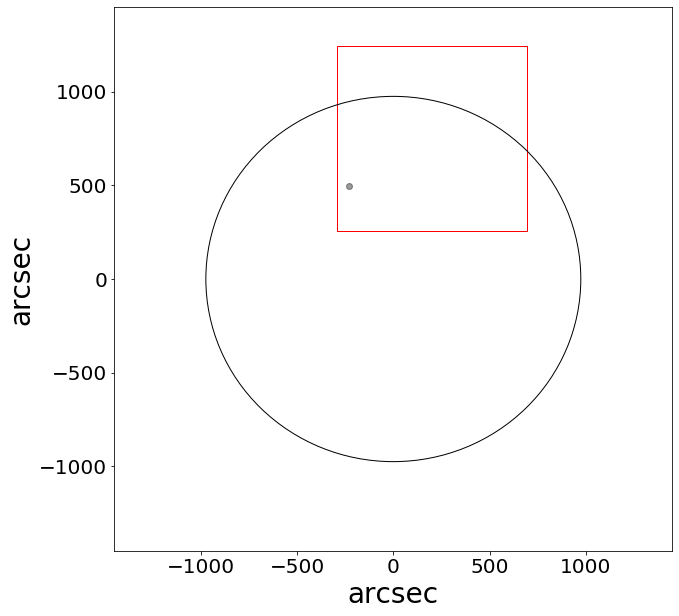

In [146]:
plotdata(F2D5S,5)

# Finding areas of interest

In [93]:
# Color code FOXSI-2 Data (GOOD) :
FX = np.stack(F2D0S['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY = np.stack(F2D0S['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
EE = np.stack(F2D0S['HIT_ENERGY']).T[1]
# FOXSI-2 Data inside solar disk
FXin = FX[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) &
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
FYin = FY[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) &
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
EEin = EE[(np.sqrt(FX**2 + FY**2) < Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) &
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
# FOXSI-2 Data outside solar disk
FXout = FX[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) & 
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
FYout = FY[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) &
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
EEout = EE[(np.sqrt(FX**2 + FY**2) > Rsun) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask) & 
          (np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) > Rmask2)]
# FOXSI-2 Data inside Ghost Ray disk
FXgr = np.concatenate((FX[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)],
                      FX[(np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) < Rmask2)]), axis=0)
FYgr =  np.concatenate((FY[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)],
                      FY[(np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) < Rmask2)]), axis=0)
EEgr = np.concatenate((EE[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)],
                      EE[(np.sqrt((FX - Xmask2 )**2 + (FY - Ymask2)**2) < Rmask2)]), axis=0)

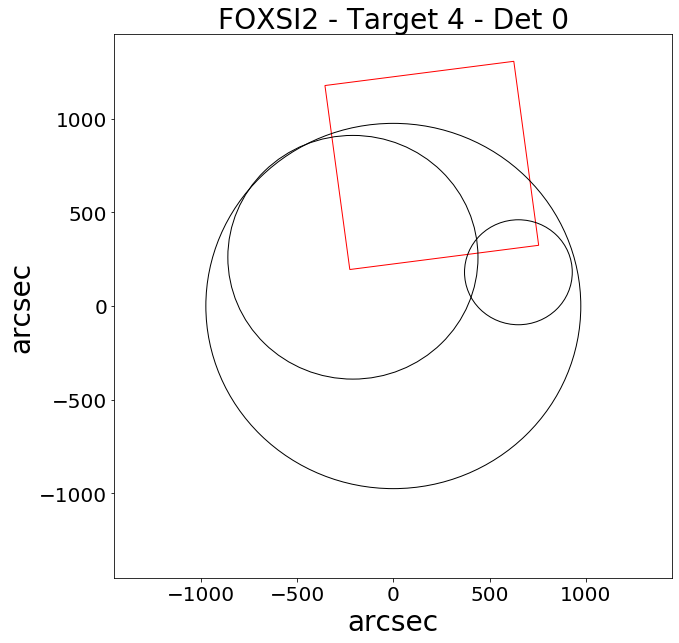

In [44]:
# Plotting
det = 0
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title(F'FOXSI2 - Target 4 - Det {det}',fontsize=28)
# Detector Area
# plt.scatter(DetArea[0], DetArea[1],marker='.',color='tab:grey')
# plt.scatter(Xnogr, Ynogr, marker='.',color='tab:green')
# plt.scatter(Xout, Yout, marker='.',color='tab:blue')
# plt.scatter(Xgr, Ygr, marker='.',color='tab:grey')
# FOXSI2 Data
# ax.scatter(FXin,FYin,marker='o',color='tab:green',alpha=1.0)
# ax.scatter(FXout,FYout,marker='o',color='tab:blue',alpha=1.)
# ax.scatter(FXgr,FYgr,marker='o',color='black',alpha=0.4)
#D0145 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= Rsun,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
circ2 = patches.Circle((Xmask2,Ymask2),radius= Rmask2,fill=False);ax.add_patch(circ2)
plt.show()
fig.savefig(f'images/Area{det}.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

## Finding Areas of interest

In [45]:
Narea = 30 # number of points to estimate the area. Use 10000 to report.
DetArea = GetDetArea(0, Narea)
# Dots inside solar disk
Xin = DetArea[0][np.sqrt(DetArea[0]**2 + DetArea[1]**2) < Rsun ]
Yin = DetArea[1][np.sqrt(DetArea[0]**2 + DetArea[1]**2) < Rsun ]
# Dots outside the ghost rays circle
Xnogr = Xin[(np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask) &
            (np.sqrt((Xin - Xmask2 )**2 + (Yin - Ymask2)**2) > Rmask2)]
Ynogr = Yin[(np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask) &
            (np.sqrt((Xin - Xmask2 )**2 + (Yin - Ymask2)**2) > Rmask2)]
# Dots outside solar disk
Xout = DetArea[0][(np.sqrt(DetArea[0]**2 + DetArea[1]**2) > Rsun) &
                   (np.sqrt((DetArea[0] - Xmask )**2 + (DetArea[1] - Ymask)**2) > Rmask)]
Yout = DetArea[1][(np.sqrt(DetArea[0]**2 + DetArea[1]**2) > Rsun) &
                   (np.sqrt((DetArea[0] - Xmask )**2 + (DetArea[1] - Ymask)**2) > Rmask)]
# Dots inside the ghost rays circle
Xgr = Xin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < Rmask]
Ygr = Yin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < Rmask]

In [46]:
# Printout Areas :
toarcsec = (990**2)/DetArea[0].size
tocm = (.96**2)/DetArea[0].size
# In arcsec^2
print('Mask Radius = {} arcsec'.format(Rmask))
print('Area inside solar disk (no ghost rays) : {0} arcsec^2 [green]'.
      format(round(Xnogr.size*toarcsec,1)))
print('Area outside solar disk (no ghost rays) : {0} arcsec^2 [blue]'.
      format(round(Xout.size*toarcsec,1)))
# In cm^2
print('Area inside solar disk (no ghost rays) : {0} cm^2 [green]'.
      format(round(Xnogr.size*tocm,4)))
print('Area outside solar disk (no ghost rays) : {0} cm^2 [blue]'.
      format(round(Xout.size*tocm,4)))
print('Events inside solar disk (no ghost rays) : {0} [green]'.
      format(FXin.size))
print('Events outside solar disk (no ghost rays) : {0} [blue]'.
      format(FXout.size))

Mask Radius = 650 arcsec
Area inside solar disk (no ghost rays) : 201935.3 arcsec^2 [green]
Area outside solar disk (no ghost rays) : 342678.0 arcsec^2 [blue]
Area inside solar disk (no ghost rays) : 0.1899 cm^2 [green]
Area outside solar disk (no ghost rays) : 0.3222 cm^2 [blue]
Events inside solar disk (no ghost rays) : 7 [green]
Events outside solar disk (no ghost rays) : 6 [blue]


### Background during Target-5

In [14]:
# Get X, Y, and E for T5 :
FX5 = np.stack(F2D0T5['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY5 = np.stack(F2D0T5['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
EE5 = np.stack(F2D0T5['HIT_ENERGY']).T[1]
# Data ONLY outside flare-1 mask
FXbgT5 = FX5[(np.sqrt((FX5 - Xflare )**2 + (FY5 - Yflare)**2) > 100)]
FYbgT5 = FY5[(np.sqrt((FX5 - Xflare )**2 + (FY5 - Yflare)**2) > 100)]
EEbgT5 = EE5[(np.sqrt((FX5 - Xflare )**2 + (FY5 - Yflare)**2) > 100)]
print(f'Events during Target 5 : {FX5.size}')
print(f'Events during Target 5 [no flare-1] : {FXbgT5.size}')

Events during Target 5 : 34
Events during Target 5 [no flare-1] : 20


In [15]:
# Find AREA in arcsec2
Narea = 30 # number of points to estimate the area.
DetArea = GetDetArea(5, Narea)
# Dots inside solar disk
Xnoflare = DetArea[0][np.sqrt((DetArea[0] - Xflare )**2 + (DetArea[1] - Yflare)**2) > 100]
Ynoflare = DetArea[1][np.sqrt((DetArea[0] - Xflare )**2 + (DetArea[1] - Yflare)**2) > 100]
# Printout Areas :
toarcsec = (990**2)/DetArea[0].size
tocm = (.96**2)/DetArea[0].size
# In arcsec^2
print('Area inside the detector but outside the flare-1 mask : {0} arcsec^2'.
      format(round(Xnoflare.size*toarcsec,1)))

Area inside the detector but outside the flare-1 mask : 980100.0 arcsec^2


### Livetime

In [16]:
lt = readsav('./Livetime/livetime_d6_target4.sav')

In [17]:
lt['ltime6_t4']['frac'][0]

0.8481090554895158

In [18]:
ls Livetime/foxsi2_livetimes

livetime_d0_t1pos0.sav      livetime_d4_t1pos0.sav
livetime_d0_t1pos1.sav      livetime_d4_t1pos1.sav
livetime_d0_t1pos2.sav      livetime_d4_t1pos2.sav
livetime_d0_t2pos0.sav      livetime_d4_t2pos0.sav
livetime_d0_t2pos1.sav      livetime_d4_t2pos1.sav
livetime_d0_t3pos0.sav      livetime_d4_t3pos0.sav
livetime_d0_t3pos1.sav      livetime_d4_t3pos1.sav
livetime_d0_t3pos2.sav      livetime_d4_t3pos2.sav
livetime_d0_t4postshtr.sav  livetime_d4_t4postshtr.sav
livetime_d0_t4preshtr.sav   livetime_d4_t4preshtr.sav
livetime_d0_t5.sav          livetime_d4_t5.sav
livetime_d1_t1pos0.sav      livetime_d5_t1pos0.sav
livetime_d1_t1pos1.sav      livetime_d5_t1pos1.sav
livetime_d1_t1pos2.sav      livetime_d5_t1pos2.sav
livetime_d1_t2pos0.sav      livetime_d5_t2pos0.sav
livetime_d1_t2pos1.sav      livetime_d5_t2pos1.sav
livetime_d1_t3pos0.sav      livetime_d5_t3pos0.sav
livetime_d1_t3pos1.sav      livetime_d5_t3pos1.sav
livetime_d1_t3pos2.sav      livetime_d5_t3pos2.sav
livetime_d1_t4postshtr.sav  

In [21]:
lt1 = readsav('./Livetime/foxsi2_livetimes/livetime_d0_t4preshtr.sav')['ltime']['frac'][0]
lt2 = readsav('./Livetime/foxsi2_livetimes/livetime_d0_t4postshtr.sav')['ltime']['frac'][0]
lt3 = readsav('./Livetime/foxsi2_livetimes/livetime_d0_t5.sav')['ltime']['frac'][0]

Aout_D0 = 335331.8 #335331.8#336726.3#331331.8#333277.8
Ain_D0 = 333995.8 #333995.8#332529.8#332738.6#334336.5
Adet = 980100.
Anoflare = 948690.5
time1 = 68.5
time2 = 24.2
time3 = 32.7

Ton = time1 * lt1
Toff1 = time1 * lt1 * Aout_D0/Ain_D0
Toff2 = time2 * lt2 * Adet/Ain_D0
Toff3 = time3 * lt3 * Anoflare/Ain_D0
print('Toff1 = {0}s, Toff2 = {1}s, Toff3 = {2}s'.
      format(round( Toff1, 1),round( Toff2, 1), round( Toff3, 1)))
print('Toff Total = {0}'.format(round(Toff1 + Toff2 + Toff3, 1)))

Toff1 = 22.5s, Toff2 = 11.8s, Toff3 = 35.4s
Toff Total = 69.6


In [22]:
round(Ton,3)

22.396

In [23]:
print(round(lt1,2))

0.33


In [24]:
round(69.6/Ton,3)

3.108

## Interpolate Effective Area for FOXSI-2
#### Given the position and energy of an event, return the respective Effective Area

In [134]:
from scipy import interpolate
import csv
import numpy as np

# EffArea Dir
EADir = './F2EffAreas/'
EAangles = np.insert(np.arange(-9,9+1,2),5,0)
EAenergies = [4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 11. , 13. , 15. , 17. , 19. , 22.5, 27.5]

def loadEA(det):
    mod = 0 if det == 6 else det
    mod = 6 if det == 0 else det
    # Read Eff Area Files
    EApanD  = csv.DictReader(open(EADir+'FOXSI2_Module_X-'+str(mod)+'_EA_pan.txt'),
                           fieldnames=EAangles) # Horizontal axis
    EAtiltD = csv.DictReader(open(EADir+'FOXSI2_Module_X-'+str(mod)+'_EA_tilt.txt'),
                           fieldnames=EAangles) # Vertical axis
    # Skip 4 lines of header
    _ = next(EApanD); _ = next(EApanD); _ = next(EApanD); _ = next(EApanD)
    _ = next(EAtiltD); _ = next(EAtiltD); _ = next(EAtiltD); _ = next(EAtiltD)
    # Save to a list :
    EApan, EAtilt = [], []
    for r in EApanD:
        EApan.append(list(r.values()))
    for r in EAtiltD:
        EAtilt.append(list(r.values()))
    # return as an array of floats
    return np.array(EApan).astype(np.float), np.array(EAtilt).astype(np.float)

def EAenergy(det, e_index, Pxi, Pyi) :
    EA6pan, EA6tilt = loadEA(det)
    EA6raw = np.concatenate((EA6pan[e_index], EA6tilt[e_index]))
    Xea = np.concatenate((EAangles,np.zeros(11)))
    Yea = np.concatenate((np.zeros(11),EAangles))
    EAe = interpolate.interp2d(Xea, Yea, EA6raw, kind='cubic')
    return float(EAe(Pxi,Pyi))

def EAi(det, E, Pxi, Pyi):
    '''  function that gives the effective area as function of the
            - detector
            - energy of the event
            - heliographic position (x,y) of the event
    '''
    Ei = 5.6 if E <= 5.6 else E
    det = 4 if det == 5 else det
    Ei = 6.501 if (E <= 6.501 and det == 4) else E
    idown = np.where(np.array(EAenergies) > Ei)[0] - 1
    iup   = np.where(np.array(EAenergies) < Ei)[0] + 1
    indices = []
    for i, j in [(i,j) for i in idown for j in iup] : 
        if i ==j : indices.append(i)
    return np.interp(Ei, (EAenergies[indices[0]], EAenergies[indices[1]]),
                     (EAenergy(det,indices[0],Pxi, Pyi), EAenergy(det,indices[1],Pxi, Pyi)))

In [135]:
# TEST: Let's suppose a position and energy for testsing
det, Ei, Pxi, Pyi = 6, 8.4, 5.5, -3.2 # det, keV, arcmin, arcmin
EAi(4, 5.4, (-277.8-T4x)/60, (912.7-T4y)/60)

7.440533170634569

In [136]:
lambda99 = [17.18, 17.61, 15.98, 15.97]
DeltaT = 54.7 # 64.5s * LiveTime (~0.85)
OmegaFullSun = 2982363.1
EEs = np.linspace(6.01,10,num=20,endpoint=True)
Dets = [0,1,4,5]
EffAreasON,EffAreasOFF,Flux99 = [], [], []
for d, l in zip(Dets,lambda99):
    EEAA,EEAAOFF = [], []
    Narea = 10 # number of points to estimate the area. Use 10000 to report.
    DetArea = GetDetArea(d, Narea)
    # Dots inside solar disk
    Xin = DetArea[0][np.sqrt(DetArea[0]**2 + DetArea[1]**2) < Rsun ]
    Yin = DetArea[1][np.sqrt(DetArea[0]**2 + DetArea[1]**2) < Rsun ]
    # Dots outside the ghost rays circle
    Xnogr = Xin[(np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask) &
                (np.sqrt((Xin - Xmask2 )**2 + (Yin - Ymask2)**2) > Rmask2)]
    Ynogr = Yin[(np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask) &
                (np.sqrt((Xin - Xmask2 )**2 + (Yin - Ymask2)**2) > Rmask2)]
    OmegaOn = round(Xnogr.size*(990**2)/DetArea[0].size,1)
    for xx, yy in zip(Xnogr, Ynogr):
        for ee in EEs:
            EEAA.append( EAi(d, ee, (xx - T4x)/60, (yy - T4y)/60) )
    for xx, yy in zip(DetArea[0].flatten(), DetArea[1].flatten()):
        for ee in EEs:
            EEAAOFF.append( EAi(d, ee, (xx - T4x)/60, (yy - T4y)/60) )
    EffAreasON.append(round(np.mean(EEAA),2))
    EffAreasOFF.append(round(np.mean(EEAAOFF),2))
    Flux99.append(l*OmegaFullSun/(DeltaT*(EEs[-1]-EEs[0])*np.mean(EEAA)*OmegaOn))

In [138]:
print(r'The averaged Eff. Area inside the solar disk are {0} cm-2'.format(EffAreasON))

The averaged Eff. Area inside the solar disk are [9.55, 9.42, 10.68, 10.79] cm-2


In [139]:
Flux99

[0.1319183141795645,
 0.12610775959978973,
 0.10972277330632291,
 0.11354317855272318]

In [35]:
EffAreasON

[9.81, 9.63, 11.04, 11.77]

In [73]:
# det = 5
# Tons = [22.4, 21.7, 0, 0, 27.5, 28.2, 0]
# EAon = [9.2, 9.4, 0, 0, 10., 11., 0]
# Aon  = [334336.5, 332738.6, 0 , 0, 332529.8, 333995.8, 0]
# Smax = (75.676e-4) * Tons[det] * (5) * EAon[det] * Aon[det] / 2982363.1
# print(f'Smax for detector {det} is {round(Smax,2)}')

Smax for detector 5 is 1.31


## Spectral Analysis

In [26]:
def plothist(FXDX):
    barwidth, emin, emax = 0.5, 5, 10
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    y,binEdges = np.histogram(es,bins=int((emax-emin)/barwidth),range=(emin,emax))
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y)
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_ylabel('Counts',fontsize=28)
    #ax.set_yticks([])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 5 - Det '+str(det),fontsize=28)
    ax.axvspan(emin, emax, alpha=0.2, color='grey')
    # FOXSI2 Data
    plt.bar(bincenters, y, width=barwidth, color='grey', yerr=menStd)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Hist.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def ExcludeMicroFlare(F2DDT5):
    # Get X, Y, and E for T5 :
    FX5DD = np.stack(F2DDT5['HIT_XY_SOLAR']).T[0] + offset_xy[0]
    FY5DD = np.stack(F2DDT5['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
    # Chose counts outside the microflare region:
    return F2DDT5[(np.sqrt((FX5DD - Xflare )**2 + (FY5DD - Yflare)**2) > 100)]

In [27]:
# Exluding Microflare:
F2D0T5NF = ExcludeMicroFlare(F2D0T5)
F2D1T5NF = ExcludeMicroFlare(F2D1T5)
F2D4T5NF = ExcludeMicroFlare(F2D4T5)
F2D5T5NF = ExcludeMicroFlare(F2D5T5)

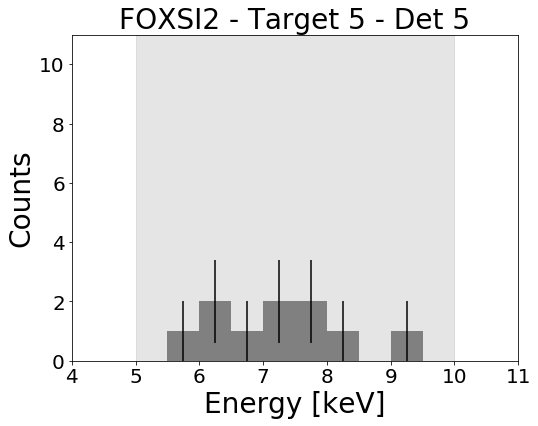

In [28]:
plothist(F2D5T5NF)

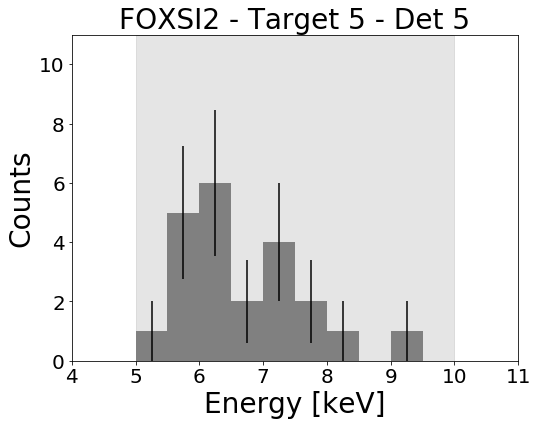

In [29]:
plothist(F2D5T5)

## Spectrum from All Det

In [30]:
def get_energies(FXDX):
    FX = np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0]
    FY = np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
    EE = np.stack(FXDX['HIT_ENERGY']).T[1]
    return EE[(np.sqrt((FX - Xflare )**2 + (FY - Yflare)**2) > 100)]

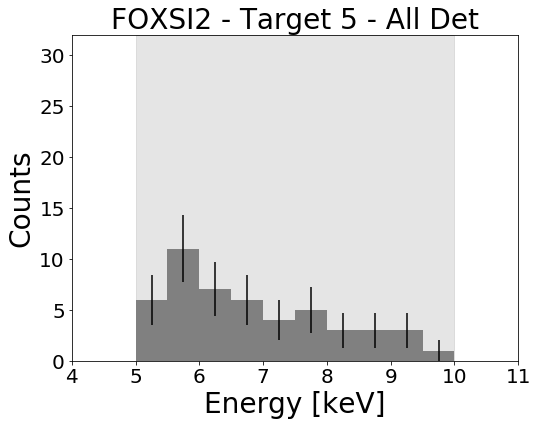

In [31]:
# Include Microflare:
EEgr0 = np.stack(F2D0T5['hit_energy']).T[1]
EEgr1 = np.stack(F2D1T5['hit_energy']).T[1]
EEgr4 = np.stack(F2D4T5['hit_energy']).T[1]
EEgr5 = np.stack(F2D5T5['hit_energy']).T[1]
EEgrAll = np.concatenate((EEgr0, EEgr1, EEgr4, EEgr5), axis=0)
# Excluding Microflare:
EEgr0NF = np.stack(F2D0T5NF['hit_energy']).T[1]
EEgr1NF = np.stack(F2D1T5NF['hit_energy']).T[1]
EEgr4NF = np.stack(F2D4T5NF['hit_energy']).T[1]
EEgr5NF = np.stack(F2D5T5NF['hit_energy']).T[1]
EEgrAllNF = np.concatenate((EEgr0NF, EEgr1NF, EEgr4NF, EEgr5NF), axis=0)
# Plot Histogram:     
barwidth, emin, emax = 0.5, 5, 10
y,binEdges = np.histogram(EEgrAllNF,bins=int((emax-emin)/barwidth),range=(emin,emax))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
fig, ax = plt.subplots(figsize=(8,6))
# ornaments
ax.set_xlim(4,11)
ax.set_ylim(0,32)
ax.set_xlabel('Energy [keV]',fontsize=28)
ax.set_ylabel('Counts',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 5 - All Det',fontsize=28)
ax.axvspan(emin, emax, alpha=0.2, color='grey')
# FOXSI2 Data
plt.bar(bincenters, y, width=barwidth, color='grey', yerr=menStd)
plt.show()
fig.savefig('images/F2T5_Hist_AllNF.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [32]:
(4*980100)*(0.166)* (24.2) / 29940688.2

0.5260076446739792